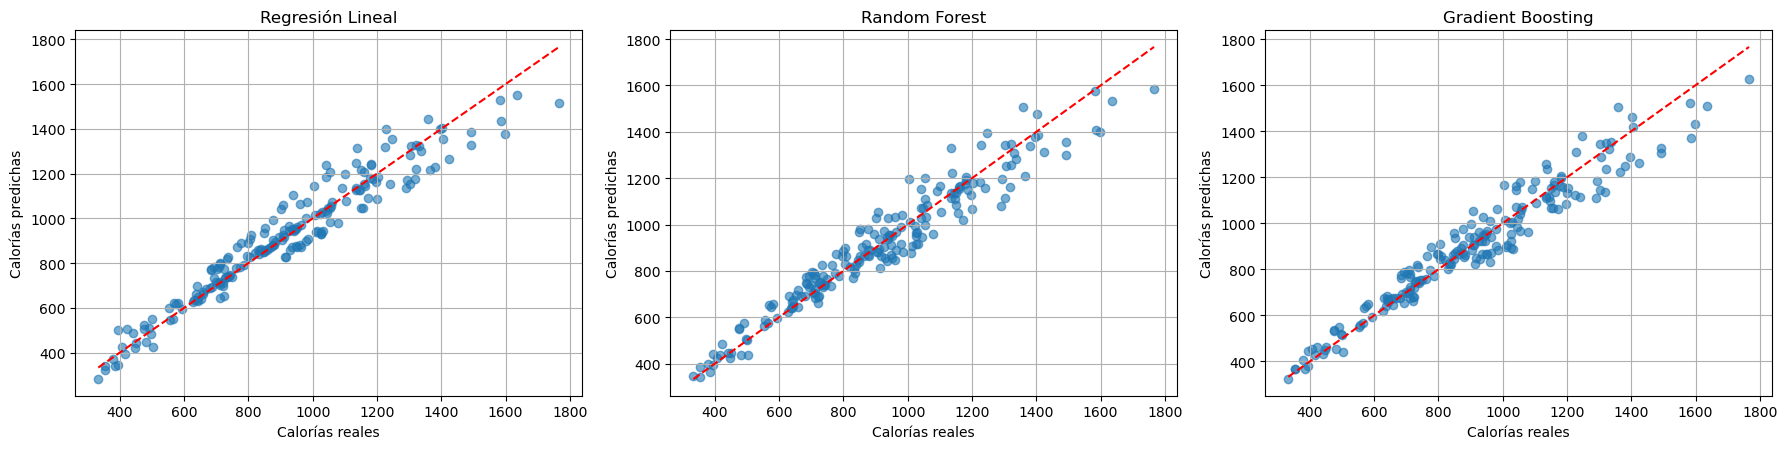


Comparativa de modelos en el Escenario C:
              Modelo        R2       RMSE
0   Regresi√≥n Lineal  0.933557  74.451600
1      Random Forest  0.934457  73.945156
2  Gradient Boosting  0.936192  72.960231

üßç Predicci√≥n para usuario real (Escenario C)
‚≠ê Calor√≠as reales: 883.00
üî• Calor√≠as estimadas (Gradient Boosting): 979.67
üìâ Diferencia absoluta: 96.67


In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv("archivo_gym_members_exercise_tracking_version2.csv")

# Variables seleccionadas para el Escenario C
variables_C = [
    'Avg_BPM', 'Max_BPM', 'Resting_BPM',
    'Session_Duration (hours)',
    'Workout_Cardio', 'Workout_HIIT',
    'Workout_Strength', 'Workout_Yoga'
]

# Eliminar filas con valores nulos
df_c = df.dropna(subset=variables_C + ['Calories_Burned'])

# Definir X e y
X = df_c[variables_C]
y = df_c['Calories_Burned']

# Escalado de variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisi√≥n en conjunto de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Comparativa de modelos
models = {
    "Regresi√≥n Lineal": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = []
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Una fila, tres columnas

# Guardar modelo Gradient Boosting para uso posterior
modelo_gb = None

for ax, (name, model) in zip(axes, models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    results.append((name, r2, rmse))

    if name == "Gradient Boosting":
        modelo_gb = model

    ax.scatter(y_test, y_pred, alpha=0.6)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
    ax.set_title(name)
    ax.set_xlabel('Calor√≠as reales')
    ax.set_ylabel('Calor√≠as predichas')
    ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Mostrar tabla comparativa
df_results = pd.DataFrame(results, columns=["Modelo", "R2", "RMSE"])
print("\nComparativa de modelos en el Escenario C:")
print(df_results)

# üîç Predicci√≥n individual para un usuario real del dataset
usuario_real = df_c.iloc[1].copy()
calorias_reales = usuario_real['Calories_Burned']
usuario_df = usuario_real[X.columns].to_frame().T  # convertir a DataFrame con las variables de C
usuario_scaled = scaler.transform(usuario_df)
pred_c = modelo_gb.predict(usuario_scaled)[0]

# Mostrar comparaci√≥n
print("\nüßç Predicci√≥n para usuario real (Escenario C)")
print(f"‚≠ê Calor√≠as reales: {calorias_reales:.2f}")
print(f"üî• Calor√≠as estimadas (Gradient Boosting): {pred_c:.2f}")
print(f"üìâ Diferencia absoluta: {np.abs(calorias_reales - pred_c):.2f}")
